<a href="https://colab.research.google.com/github/jodog0412/US-STOCKS-INVESTMENT-ASSISTANCE/blob/master/US_STOCK_INVESTMENT_ASSISTANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Stock Analysis
- 포트폴리오 시각화
- 포트폴리오 수익률 분석
- 종목 검색
- 재무제표 비교
- 재무제표 시각화

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab/US_STOCK_INVESTMENT_ASSISTANCE
!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab/US_STOCK_INVESTMENT_ASSISTANCE
US_STOCK.gsheet  US_STOCK_INVESTMENT_ASSISTANCE.ipynb


## IMPORT FUNCTION

In [3]:
!pip install yfinance
!pip install finance-datareader
import numpy as np
import pandas as pd
import yfinance as yf
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## DATAFRAME

In [6]:
# DATA
sheet=gc.open('US_STOCK').sheet1
data_raw=pd.DataFrame(sheet.get_all_values())
pf=pd.DataFrame(data=data_raw.values,
                columns=["TICKER","TAG","AVER_PRICE","STOCK_NUM","STOCK_QUANTITY"])
pf=pf.sort_values(by="TICKER")
ticker=pf.loc[:,"TICKER"].values
date='2022-09-25'

## DATA VISUALIZATION

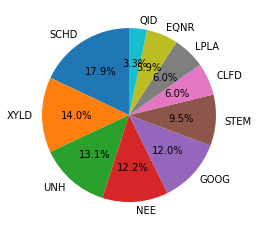

In [7]:
def portfolio_plt(pf):
    pf=pf.sort_values("STOCK_QUANTITY",ascending=False)
    pf_plot=plt.pie(pf["STOCK_QUANTITY"],labels=pf.loc[:,"TICKER"],
                    autopct='%.1f%%',startangle=90)    
    return(plt.show(pf_plot))
portfolio_plt(pf) 

In [8]:
def holds_dataframing(company,date): #수익률 데이터화
    data_yf=yf.download(list(ticker),start='2022-01-01',end=date,progress=False)
    recent_price=data_yf['Adj Close'].iloc[-1]
    profit=(recent_price/pf['AVER_PRICE'].values.astype(float)-1)*100
    prf=profit.sort_values(ascending=False)
    return(prf)

holds_dataframing(ticker,date) #회사 리스트,날짜

QID     17.263249
NEE      7.756590
UNH     -3.643325
LPLA    -4.590717
STEM    -6.942593
XYLD    -9.617613
SCHD   -12.099690
GOOG   -17.247999
CLFD   -21.705358
EQNR   -22.753480
Name: 2022-09-23 00:00:00, dtype: float64

## TICKER SEARCH

In [ ]:
# ['가정용품', '개인, 가정 용품 및 서비스', '건설 및 엔지니어링', 
# '건설장비 및 대형차, 기차, 배', '건축 자재', '교육서비스', '기타 금융업',
# '다양한 금융서비스', '다양한 산업재 도매업', '다양한 소매업',
# '레저 상품', '메탈&마이닝', '미디어 및 출판', '반도체 및 반도체 장비', 
# '보험', '복합 기업', '복합 유틸리티', '부동산 운영 관리',
# '비즈니스교육', '사무기기', '생명과학 및 메디컬 리서치', '석유',
# '섬유 및 의류', '소프트웨어 및 IT서비스', '수도 유틸리티',
# '식품 및 담배', '식품 및 약품소매', '오일 및 가스', 
# '오일 및 가스 장비 및 서비스', '용기 및 포장', '우라늄', '우주항공 및 국방',
# '운송 인프라', '운송업', '은행', '음료', '자동차 및 자동차 부품', 
# '재생에너지', '전기 유틸리티', '전문 및 상업 서비스', '전문품 상점',
# '전자 장비 및 부품', '제약', '종이 및 임산물', '주택 및 상업용 리츠', 
# '주택건설', '천연가스 유틸리티', '커뮤니케이션 및 네트워킹',
# '컴퓨터, 전화 및 가전제품', '통신 서비스', '통합 하드웨어 및 소프트웨어', 
# '투자은행 및 서비스', '핀테크', '학교',
# '헬스케어 업체 및 서비스', '헬스케어 장비 및 용품', '호텔 및 엔터테인먼트', '화물 및 물류 서비스', '화학']

date_start='2022-08-16'
def ticker_search(index,sector):
    global tsf
    data_fdr = fdr.StockListing(index)
    data_fdr = dict(list(data_fdr.groupby('Industry')))
    tickers=list(data_fdr[sector]['Symbol'].values)
    data_by_sector=yf.download(tickers,start=date_start,end=date,progress=False)
    data_by_sector=data_by_sector['Adj Close'].iloc[-1]-data_by_sector['Adj Close'].iloc[0]
    tsf=pd.Series(data_by_sector).sort_values(ascending=False)
    # tf.to_excel(excel_writer="./data/%s_PROFIT_%s.xlsx"%(index,sector))
    return(tsf)
ticker_search('NASDAQ','소프트웨어 및 IT서비스')

100%|██████████| 4617/4617 [00:16<00:00, 276.58it/s]



6 Failed downloads:
- RHDM: No data found, symbol may be delisted
- MTSL: No data found, symbol may be delisted
- VRTU: No data found, symbol may be delisted
- MVNR: No data found for this date range, symbol may be delisted
- TLND: No data found, symbol may be delisted
- EIGI: No data found, symbol may be delisted


PDD     20.420002
PANW    13.406662
ZS       9.399994
XMTR     8.040001
AZPN     6.300003
          ...    
MTSL          NaN
MVNR          NaN
RHDM          NaN
TLND          NaN
VRTU          NaN
Length: 422, dtype: float64

In [ ]:
search=tsf[400:]
search[:7]

SABRP   -17.880005
CDNS    -17.950012
SPLK    -18.880005
ADSK    -21.960007
FIVN    -22.510002
ANSS    -24.920013
ZM      -26.570000
dtype: float64

## FINANCIALS COMPARISON

In [11]:
holds=['STEM','GOOG','EQNR','CLFD','LPLA']
view=['ZM','MELI','ADBE','ADSK']

finan=[]
def financial_shape(ticker):
    ticker_yf=yf.Ticker(ticker)
    info=ticker_yf.info
    if "trailingPE" in info:
        finan.append([info["trailingPE"], info["forwardPE"], info["priceToBook"],
                      info["pegRatio"], info["returnOnEquity"],info["shortPercentOfFloat"],
                      info["quickRatio"]])
    else:
        finan.append(["NaN", info["forwardPE"], info["priceToBook"],
                      info["pegRatio"], info["returnOnEquity"], info["shortPercentOfFloat"],
                      info["quickRatio"]])

def financial_comparison(tickerlist):
    for i in tickerlist: 
        financial_shape(i)
    df=pd.DataFrame(data=finan,
                    index=tickerlist,
                    columns=['PER', 'FPER', 'PBR',
                             'PEGR', 'ROE', 'short%', 'qRatio'])
    df=df.sort_values('FPER',ascending=False)
    return df

financial_comparison(holds)

,PER,FPER,PBR,PEGR,ROE,short%,qRatio
CLFD,31.720282,25.699717,9.138713,NaN,0.34121,0.0950,1.619
GOOG,18.711319,16.780033,5.077829,2.68,0.29216,NaN,2.642
LPLA,35.757670,13.230125,9.594694,1.06,0.29740,0.0283,2.936
EQNR,6.391650,6.840426,2.487427,NaN,0.41539,NaN,1.294
STEM,11.813560,-43.562500,3.564306,NaN,0.04848,0.0887,1.912


## FINANCIALS VISUALIZATION

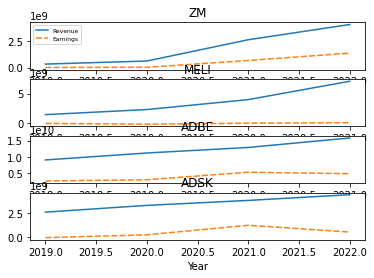

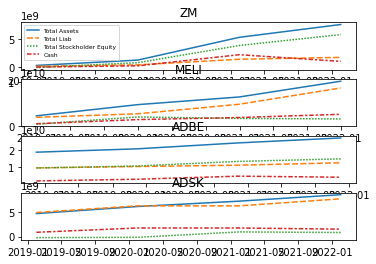

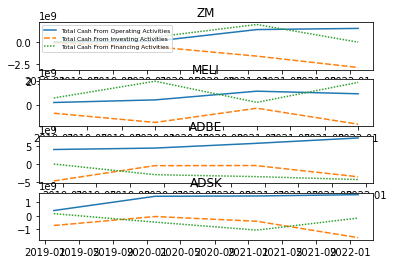

In [ ]:
def plt_earning(tickerlist):
    fig, axs = plt.subplots(len(tickerlist))
    for i in range(0,len(tickerlist)):
        #get datas for balance sheet
        ticker_yf=yf.Ticker(tickerlist[i])
        earning=ticker_yf.earnings
        #plotting
        sns.lineplot(data=earning,ax=axs[i],legend=False)
        if i==0:
            axs[i].legend(["Revenue","Earnings"],
                          loc=2,
                          prop={'size': 6})
        axs[i].set_title(tickerlist[i])
    plt.show()

def plt_balance(tickerlist):
    fig, axs = plt.subplots(len(tickerlist))
    for i in range(0,len(tickerlist)):
        #get datas for balance sheet
        ticker_yf=yf.Ticker(tickerlist[i])
        balance=ticker_yf.balance_sheet.loc[["Total Assets","Total Liab","Total Stockholder Equity","Cash"]]
        balance=balance.transpose().sort_index()
        #plotting
        sns.lineplot(data=balance,ax=axs[i],legend=False)
        if i==0:
            axs[i].legend(["Total Assets","Total Liab","Total Stockholder Equity","Cash"],
                          loc=2,
                          prop={'size': 6})
        axs[i].set_title(tickerlist[i])
    plt.show()

def plt_cashflow(tickerlist):
    fig, axs = plt.subplots(len(tickerlist))
    for i in range(0,len(tickerlist)):
        #get datas for balance sheet
        ticker_yf=yf.Ticker(tickerlist[i])
        cashflow=ticker_yf.cashflow.loc[["Total Cash From Operating Activities",
                                         "Total Cashflows From Investing Activities",
                                         "Total Cash From Financing Activities"]]
        cashflow=cashflow.transpose().sort_index()
        sns.lineplot(data=cashflow,ax=axs[i],legend=False)
        if i==0:
            axs[i].legend(["Total Cash From Operating Activities",
                           "Total Cash From Investing Activities",
                           "Total Cash From Financing Activities"],
                          loc=2,
                          prop={'size': 6})
        axs[i].set_title(tickerlist[i])
    plt.show()

plt_earning(view)
plt_balance(view)
plt_cashflow(view)

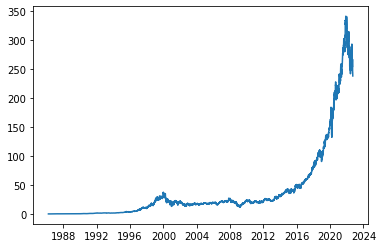

In [87]:
from pandas.compat.pyarrow import pa
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

ticker_ml=yf.Ticker("MSFT")
data_raw=ticker_ml.history(period="max")
X=data_raw.drop(['Close'],axis=1)
Y=data_raw['Close']
x_train,x_test,y_train,y_test=train_test_split(X,
                                               Y,
                                               test_size=0.2)
plt.plot(data_raw.index,Y)

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Train Score: {}".format(model.score(x_train,y_train)*100))
print("Test Score: {}".format(model.score(x_test,y_test)*100))
mean_squared_error(y_test,y_pred,squared=False)

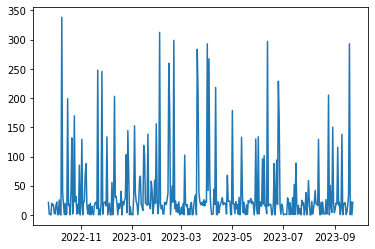

In [85]:
data_pred=pd.DataFrame({"Pred":y_pred},index=pd.date_range(start=data_raw.index[-1], 
                                                           periods=len(y_pred), freq="D"))
data_pred
plt.plot(data_pred[:365])